In [1]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics

### Reading data and cleaning

In [2]:
hdt = pd.read_csv('./house-data.csv', index_col=None, na_values=['NA'])

In [3]:
hdt.shape

(21613, 21)

In [4]:
hdt.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21556,476000017,20141003T000000,553000.0,2,2.00,1400,1512,2.0,0,0,...,8,940,460,2006,0,98107,47.6719,-122.392,1400,3500
21042,1389600040,20141226T000000,255000.0,4,2.50,1987,6000,2.0,0,0,...,7,1987,0,2011,0,98001,47.2679,-122.255,1880,9589
11933,7215721070,20140929T000000,485500.0,4,2.50,1800,4500,2.0,0,0,...,8,1800,0,1999,0,98075,47.5998,-122.014,1800,4500
17675,1568100730,20150218T000000,325000.0,2,2.00,1040,5796,1.0,0,2,...,6,1040,0,1921,0,98155,47.7362,-122.290,2300,5796
14611,2423069170,20140603T000000,770000.0,3,2.50,2430,54059,2.0,0,0,...,10,2430,0,1987,0,98027,47.4664,-121.992,2910,49658
12438,9468200163,20140709T000000,680000.0,3,2.00,1780,5720,1.0,0,0,...,7,980,800,1925,0,98103,47.6794,-122.351,1620,5050
5692,1423800380,20150312T000000,309950.0,4,1.75,1450,10074,1.0,0,0,...,7,1450,0,1966,0,98058,47.4546,-122.182,1340,8023
4196,8562500690,20140513T000000,581000.0,4,1.75,2090,8164,1.0,0,0,...,8,1070,1020,1963,0,98052,47.6715,-122.155,1310,7975
9738,8701600030,20141113T000000,518000.0,5,1.00,1590,5000,1.5,0,0,...,7,1190,400,1929,0,98116,47.5752,-122.381,1590,5000
2127,4345000510,20150428T000000,325000.0,3,2.50,1800,8518,2.0,0,0,...,7,1800,0,1996,0,98030,47.3643,-122.185,1770,7570


In [5]:
hdt = hdt.drop('id', axis=1)

In [6]:
hdt['date'] = pd.to_datetime(hdt['date'], format='%Y%m%dT%H%M%S')

In [7]:
hdt.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Checking correlation to determine what columns to drop to reduce dimensionality

In [8]:
hdt.corr()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,1.000000,-0.004357,-0.016800,-0.034410,-0.034559,0.006313,-0.022491,0.001356,-0.001800,-0.050769,-0.039912,-0.027924,-0.019469,-0.000355,-0.024509,0.001404,-0.032856,-0.007020,-0.031515,0.002566
price,-0.004357,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,-0.016800,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,-0.034410,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.034559,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.006313,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,-0.022491,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.001356,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,-0.001800,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.050769,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [9]:
zipcode_counts = hdt['zipcode'].value_counts()
zipcode_counts

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64

### Dropping columns 

In [10]:
hdt = hdt.drop(['yr_built', 'condition','sqft_living15','sqft_lot15','sqft_lot','waterfront','view','zipcode','yr_renovated'], axis=1)

In [11]:
hdt = hdt.drop('date',axis=1)

In [12]:
hdt.shape

(21613, 10)

In [13]:
hdt.describe()

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_basement,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.494309,7.656873,1788.390691,291.509045,47.560053,-122.213896
std,3.671272e+05,0.930062,0.770163,918.440897,0.539989,1.175459,828.090978,442.575043,0.138564,0.140828
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1.000000,290.000000,0.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,7.000000,1190.000000,0.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,7.000000,1560.000000,0.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,8.000000,2210.000000,560.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,13.000000,9410.000000,4820.000000,47.777600,-121.315000


### With cleaned data we can now explore

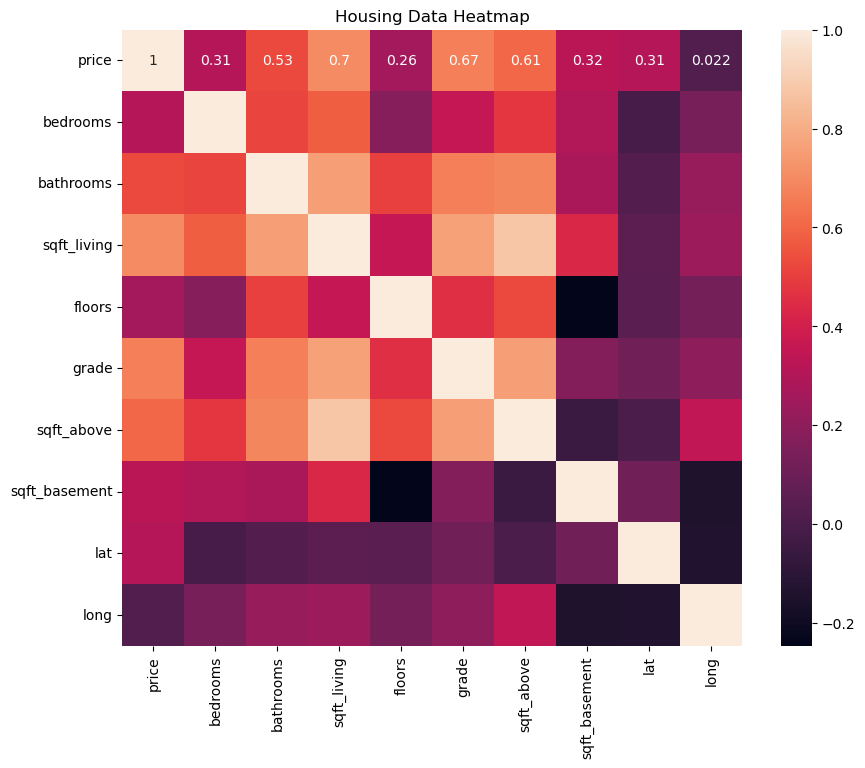

In [14]:
hdtcorr = hdt.corr()

plt.figure(figsize = (10,8))
sns.heatmap(hdtcorr, annot=True)

plt.title('Housing Data Heatmap')

plt.show()

In [15]:
grade_counts = hdt['grade'].value_counts()
grade_counts

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

Text(0.5, 1.0, 'Frequency of grades')

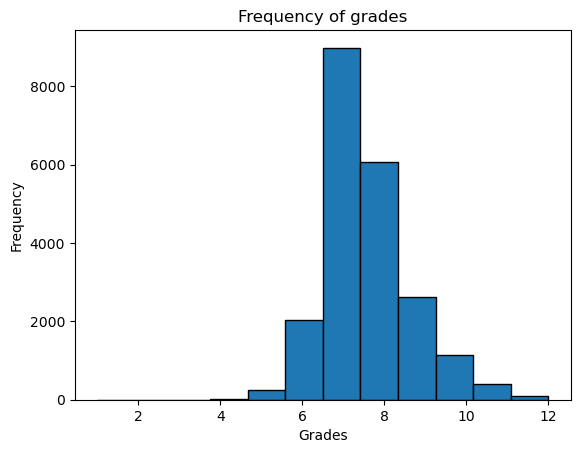

In [16]:
hdt_grades=hdt['grade']
num_bins = 12
bin_edges = np.linspace(1,12, num_bins +1 )
plt.hist(hdt_grades, bins=bin_edges, edgecolor ='black')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.title('Frequency of grades')

<Axes: >

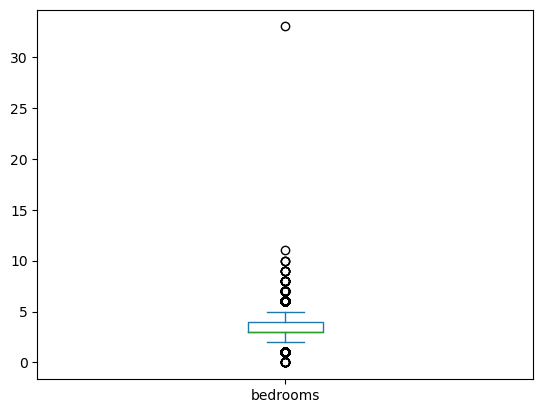

In [17]:
hdt.bedrooms.plot.box()

In [18]:
hdt.bedrooms.max()

33

In [19]:
hdt_outlier = hdt[hdt['bedrooms'] == 33]
hdt_outlier.head()

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_basement,lat,long
15870,640000.0,33,1.75,1620,1.0,7,1040,580,47.6878,-122.331


In [20]:
hdt = hdt.drop(15870)

Text(0.5, 1.0, 'Frequency of Bedrooms')

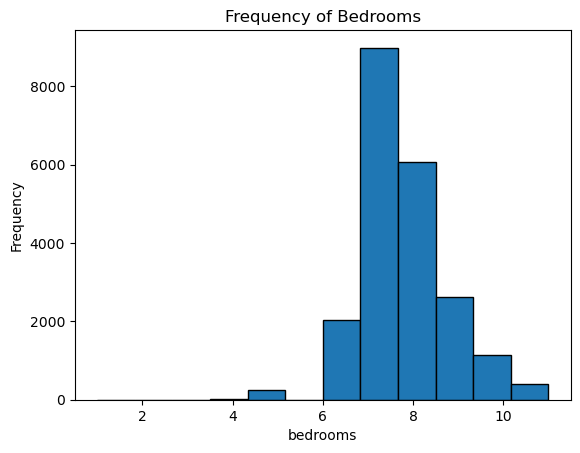

In [21]:
hdt_bedrooms=hdt['bedrooms']
num_bins = 12
bin_edges = np.linspace(1, hdt_bedrooms.max(), num_bins +1 )
plt.hist(hdt_grades, bins=bin_edges, edgecolor ='black')
plt.xlabel('bedrooms')
plt.ylabel('Frequency')
plt.title('Frequency of Bedrooms')

/Users/daniel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


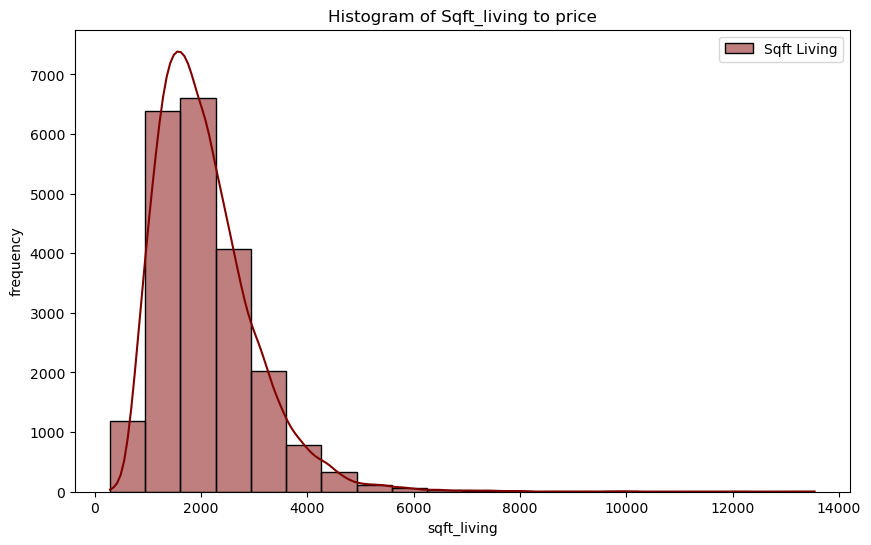

In [22]:
plt.figure(figsize=(10, 6))

sns.histplot(data=hdt, x='sqft_living', kde=True, bins=20, color='maroon', label='Sqft Living')

plt.xlabel('sqft_living')
plt.ylabel('frequency')
plt.title('Histogram of Sqft_living to price')
plt.legend()

plt.show()

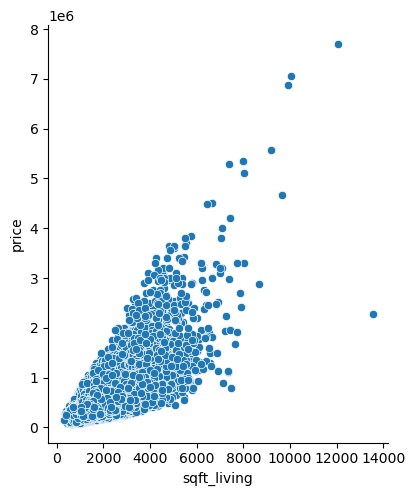

In [23]:
dfnm = hdt[['sqft_living', 'price']]
sns.pairplot(dfnm, x_vars='sqft_living', y_vars='price', height=5, aspect=0.8)

/var/folders/jk/_91wr3q55nx26_4q5dsyjd2m0000gn/T/ipykernel_71845/3236873728.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfnm = dfny[np.abs(stats.zscore(hdt['price'])) < 3.5]


<Axes: xlabel='sqft_living', ylabel='price'>

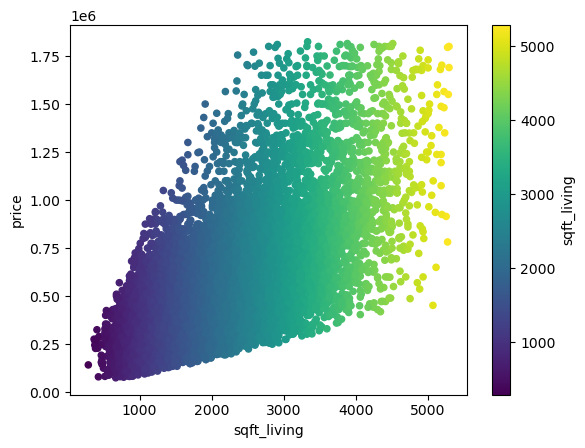

In [109]:
# z-score filter of outliers: (z-score < 3.5*std) in a column
from scipy import stats
dfny = hdt[np.abs(stats.zscore(hdt['sqft_living'])) < 3.5]
dfnm = dfny[np.abs(stats.zscore(hdt['price'])) < 3.5]
dfnm.plot.scatter(x='sqft_living', y='price', c='sqft_living', colormap='viridis')

### Map showing placements of houses, click to see price

In [24]:
import folium
hdtmap = folium.Map(location = [55.6819, 12.5627], zoom_start = 3)

In [25]:
political_countries_url = ("http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson")
folium.GeoJson(political_countries_url).add_to(hdtmap)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [31]:
hdtmap

In [30]:
for index, row in hdt.iloc[:200].iterrows():
    marker = ''
    loc = row['lat'], row['long'] 
    pop = str(int(row['price']))
    marker = folium.Marker(location=loc, popup=pop, 
                           tooltip = "Click me!", icon = folium.Icon(color="green", icon='flag'))
    marker.add_to(hdtmap)

(21612, 2)